<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

# Underlying Statistical Process

### Problem definition

Rare event problems demand an early detection or prediction to prevent the event or minimize its impact.  

In literature, detection and prediction are considered as different problems. However, in the problems discussed here, early detection eventually becomes a prediction. For example, early detection of a condition that would lead to a sheet-break is essentially predicting an imminent sheet-break. This can, therefore, be formulated as a **“prediction”** problem.

First, the statistical process behind a rare event problem is understood.
This helps in selecting an appropriate approach

The process and data commonalities in the rare event examples in are  
> time series,  
> multivariate, and  
> imbalanced binary labels.  
    
Consider our working example of a sheet-break problem. It is from a continuous paper manufacturing process that generates a data stream.This makes the underlying process a stochastic time series.  

Additionally, this is a multivariate data streamed from multiple sensors placed in different parts of the machine. These sensors collect the process variables, such as temperature, pressure, chemical dose, etc.  

Thus, at any time t, a vector of observations xt is recorded. Here, xt is a vector of length equal to the number of sensors and xit the reading of the i-th sensor at time t. Such a process is known as a multivariate time series.

>Putting them together, we have an imbalanced multivariate stochastic time series process.

### Challenges
The step after formulating a problem is to identify the modeling challenges. Challenges, if identified, enable a better modeling direction. It
tells a practitioner the issues to address during the modeling.  

A few acute challenges posed by a rare event problem are,
> high-dimensional multivariate time series process,  
> early prediction, and  
> imbalanced data.

<details>
<summary>
Roadmap for Building Machine Learning Models
</summary>
<p>


    1. Prepare Problem  
    a) Define The Business Objective  
    b) Select the datasets  
    c) Load dataset  
    d) Load libraries  


**Data Pre-processing**  
This is the first step in building a machine learning model. Data pre-processing refers to the transformation of data
before feeding it into the model. It deals with the techniques that are used to convert unusable raw data into clean 
reliable data.  
  
Since data collection is often not performed in a controlled manner, raw data often contains outliers 
(for example, age = 120), nonsensical data combinations (for example, model: bicycle, type: 4-wheeler), missing values, 
scale problems, and so on. Because of this, raw data cannot be fed into a machine learning model because it might 
compromise the quality of the results. As such, this is the most important step in the process of data science.  
  

    2. Summarize Data  
    a) Descriptive statistics  
    b) Data visualizations  

    3. Prepare Data  
    a) Data Cleaning  
    b) Feature Selection  
    c) Data Transformation  

**Model Learning**  
After pre-processing the data and splitting it into train/test sets (more on this later), we move on to modeling. Models 
are nothing but sets of well-defined methods called algorithms that use pre-processed data to learn patterns, which can 
later be used to make predictions. There are different types of learning algorithms, including supervised, semi-supervised, 
unsupervised, and reinforcement learning. These will be discussed later.
  
    4. Modeling Strategy  
    a) Select Suitable Algorithms  
    b) Select Training/Testing Approaches  
    c) Train   
  
  
**Model Evaluation**  
In this stage, the models are evaluated with the help of specific performance metrics. With these metrics, we can go on to 
tune the hyperparameters of a model in order to improve it. This process is called hyperparameter optimization. We will 
repeat this step until we are satisfied with the performance.  
  
    4. Evaluate Algorithms  
    a) Split-out validation dataset  
    b) Test options and evaluation metric  
    c) Spot Check Algorithms  
    d) Compare Algorithms  
  
**Prediction**  
Once we are happy with the results from the evaluation step, we will then move on to predictions. Predictions are made 
by the trained model when it is exposed to a new dataset. In a business setting, these predictions can be shared with 
decision makers to make effective business choices.  
  
    5. Improve Accuracy  
    a) Algorithm Tuning  
    b) Ensembles  

**Model Deployment**  
The whole process of machine learning does not just stop with model building and prediction. It also involves making use 
of the model to build an application with the new data. Depending on the business requirements, the deployment may be a 
report, or it may be some repetitive data science steps that are to be executed. After deployment, a model needs proper 
management and maintenance at regular intervals to keep it up and running.  

    6. Finalize Model  
    a) Predictions on validation dataset  
    b) Create standalone model on entire training dataset  
    c) Save model for later use  


</p>
</details>

<a id="I"></a>

# Sheet Break Problem Dataset

An anonymized data from the paper manufacturing plant for sheet break. It contains data at two minutes frequency with the time information present in the DateTime column. The system’s status with regards to normal versus break is present in the SheetBreak column with the corresponding values as 0 and 1.   

These remaining columns include timestamped measurements for the predictors. The predictors include raw materials, such as the amount of pulp fiber, chemicals, etc., and the process variables, such as blade type, couch vacuum, rotor speed, etc.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Classifiers packages

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  # Class
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
# Disply all Columns
pd.options.display.max_columns=70

In [4]:
papermf = pd.read_csv('processminer-sheet-break-rare-event-dataset.csv')
papermf.head()

,DateTime,SheetBreak,RSashScanAvg,CT#1 BLADE PSI,P4 CT#2 BLADE PSI,Bleached GWD Flow,ShwerTemp,BlndStckFloTPD,C1 BW SPREAD CD,RS BW SPREAD CD,C1 BW SPREAD MD,RS BW SPREAD MD,C1 BW SCAN AVG,RS BW SCAN AVG,CoatBrkFlo,Clay Flow,CouchLoVac,COUCH VAC,4PrsTopLd,4PrsBotLod,CalndrDrw,2DryrDrw,3DryrDrw,4DryrDraw,1PrsTopDrw,4PrsBotDrw,FanPmpSpd,FlBxHdrVac,FlatBxVac,Grade&Bwt,UnblGWDFlo,Hdbox pH,HdBxLiqLvl,"TotHead""",HorzSlcPos,KraftFlow,CouchLoad,C1MoSprdCD,RSMoSprdCD,C1MoSprdMD,RSMoSprdMD,RL MoisAct,PrScrRjFlo,RwBrkFlo,RcycFbrFlo,RetnAidFlo,RUSH DRAG,Rush/Drag,SilicaFlo,HBxSlcTemp,SodAlumFlo,CouchSpd,MachSpd,1PrsTopSpd,4PrsBotSpd,WtNStarFlo,BasWgtFlo,TMP Flow,HBxTotHead,TrayCons,UpprHdTmpRL,VertSlcPos,EventPress
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,-0.059966,-0.038189,0.877951,-0.052959,-13.306135,0.101068,0.041800,0.199901,-2.327329,-0.944167,3.075199,0.123154,-0.104334,-0.570710,-9.784456,0.355960,15.842819,-0.451974,-0.105282,96,-134.277862,0.058726,-0.021645,9.366755,0.002151,-69.187583,4.232571,-0.225267,-0.196872,-0.072449,-0.103732,-0.720746,-5.412436,76.679042,-0.632727,1351.632859,-0.657095,-0.434947,-108.775969,0.084856,10.210182,11.295155,29.984624,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230658,-0.128733,-18.758079,0.000732,-0.061114,-0.059966,-0.038189,0.873273,-0.014244,-13.306135,0.101108,0.041447,0.304313,-2.340627,-0.939994,3.075199,0.123154,-0.104334,-0.574861,-9.784456,0.360160,16.491684,-0.450451,-0.092430,96,-134.480194,0.058759,-0.004579,9.350215,0.002149,-68.585197,4.311490,-0.225267,-0.196872,-0.059103,-0.083895,-0.720746,-8.343222,78.181598,-0.632727,1370.378949,-0.875628,-1.125819,-108.848967,0.085146,12.534340,11.290761,29.984624,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,-0.030057,-0.018352,1.004910,0.065150,-9.619596,0.101148,0.041095,0.252839,-2.353925,-0.935824,3.075199,0.123154,-0.104334,-0.579013,-9.784456,0.364356,15.972885,-0.448927,-0.097144,96,-133.946587,0.058791,-0.084658,9.037409,0.002148,-67.838187,4.809914,-0.225267,-0.186801,-0.048696,-0.073823,-0.720746,-1.085166,79.684154,-0.632727,1368.123089,-0.037775,-0.519541,-109.086577,0.085436,18.582893,11.286366,29.984624,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,-0.019986,-0.008280,0.930037,-0.067199,-15.196531,0.101188,0.040742,0.072873,-2.367223,-0.931651,3.075199,0.123154,-0.104334,-0.583165,-9.784456,0.368556,15.608688,-0.447404,-0.160073,96,-134.002586,0.058824,-0.055118,9.020625,0.002146,-67.091148,5.308343,-0.225267,-0.186801,-0.047017,-0.063752,-0.720746,6.172891,81.186702,-0.632727,1365.691449,-0.987410,0.674524,-109.562774,0.085726,17.719032,11.281972,29.984624,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,-0.030057,-0.008280,0.828410,-0.018472,-14.609266,0.101229,0.040390,0.171033,-2.380521,-0.927478,3.075199,0.123154,-0.104334,-0.587316,-9.784456,0.372756,15.606125,-0.445880,-0.131630,96,-133.145706,0.058856,-0.153851,9.344233,0.002145,-65.991813,5.806771,-0.225267,-0.186801,-0.057088,-0.063752,-0.720746,-3.379599,82.689258,-0.632727,1363.257859,-0.238444,-0.063044,-110.038909,0.086016,16.855202,11.277577,29.984624,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [5]:
papermf.columns

Index(['DateTime', 'SheetBreak', 'RSashScanAvg', 'CT#1 BLADE PSI',
       'P4 CT#2 BLADE PSI', 'Bleached GWD Flow', 'ShwerTemp', 'BlndStckFloTPD',
       'C1 BW SPREAD CD', 'RS BW SPREAD CD', 'C1 BW SPREAD MD',
       'RS BW SPREAD MD', 'C1 BW SCAN AVG', 'RS BW SCAN AVG', 'CoatBrkFlo',
       'Clay Flow', 'CouchLoVac', 'COUCH VAC', '4PrsTopLd', '4PrsBotLod',
       'CalndrDrw', '2DryrDrw', '3DryrDrw', '4DryrDraw', '1PrsTopDrw',
       '4PrsBotDrw', 'FanPmpSpd', 'FlBxHdrVac', 'FlatBxVac', 'Grade&Bwt',
       'UnblGWDFlo', 'Hdbox pH', 'HdBxLiqLvl', 'TotHead"', 'HorzSlcPos',
       'KraftFlow', 'CouchLoad', 'C1MoSprdCD', 'RSMoSprdCD', 'C1MoSprdMD',
       'RSMoSprdMD', 'RL MoisAct', 'PrScrRjFlo', 'RwBrkFlo', 'RcycFbrFlo',
       'RetnAidFlo', 'RUSH DRAG', 'Rush/Drag', 'SilicaFlo', 'HBxSlcTemp',
       'SodAlumFlo', 'CouchSpd', 'MachSpd', '1PrsTopSpd', '4PrsBotSpd',
       'WtNStarFlo', 'BasWgtFlo', 'TMP Flow', 'HBxTotHead', 'TrayCons',
       'UpprHdTmpRL', 'VertSlcPos', 'EventPress'],
  

In [6]:
papermf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20458 entries, 0 to 20457
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           20458 non-null  object 
 1   SheetBreak         20458 non-null  int64  
 2   RSashScanAvg       20458 non-null  float64
 3   CT#1 BLADE PSI     20458 non-null  float64
 4   P4 CT#2 BLADE PSI  20458 non-null  float64
 5   Bleached GWD Flow  20458 non-null  float64
 6   ShwerTemp          20458 non-null  float64
 7   BlndStckFloTPD     20458 non-null  float64
 8   C1 BW SPREAD CD    20458 non-null  float64
 9   RS BW SPREAD CD    20458 non-null  float64
 10  C1 BW SPREAD MD    20458 non-null  float64
 11  RS BW SPREAD MD    20458 non-null  float64
 12  C1 BW SCAN AVG     20458 non-null  float64
 13  RS BW SCAN AVG     20458 non-null  float64
 14  CoatBrkFlo         20458 non-null  float64
 15  Clay Flow          20458 non-null  float64
 16  CouchLoVac         204

In [7]:
papermf.describe().transpose().T  # change the rows and columns

,SheetBreak,RSashScanAvg,CT#1 BLADE PSI,P4 CT#2 BLADE PSI,Bleached GWD Flow,ShwerTemp,BlndStckFloTPD,C1 BW SPREAD CD,RS BW SPREAD CD,C1 BW SPREAD MD,RS BW SPREAD MD,C1 BW SCAN AVG,RS BW SCAN AVG,CoatBrkFlo,Clay Flow,CouchLoVac,COUCH VAC,4PrsTopLd,4PrsBotLod,CalndrDrw,2DryrDrw,3DryrDrw,4DryrDraw,1PrsTopDrw,4PrsBotDrw,FanPmpSpd,FlBxHdrVac,FlatBxVac,Grade&Bwt,UnblGWDFlo,Hdbox pH,HdBxLiqLvl,"TotHead""",HorzSlcPos,KraftFlow,CouchLoad,C1MoSprdCD,RSMoSprdCD,C1MoSprdMD,RSMoSprdMD,RL MoisAct,PrScrRjFlo,RwBrkFlo,RcycFbrFlo,RetnAidFlo,RUSH DRAG,Rush/Drag,SilicaFlo,HBxSlcTemp,SodAlumFlo,CouchSpd,MachSpd,1PrsTopSpd,4PrsBotSpd,WtNStarFlo,BasWgtFlo,TMP Flow,HBxTotHead,TrayCons,UpprHdTmpRL,VertSlcPos,EventPress
count,20458.000000,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,20458.000000,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,2.045800e+04,20458.000000
mean,0.006599,2.913974e-10,1.099848e-11,5.088529e-11,6.756306e-09,3.128003e-12,-1.005711e-09,-1.850231e-10,-2.371488e-10,-2.532051e-11,3.730370e-10,-3.010899e-10,-4.545902e-10,1.188054e-10,-6.814100e-11,2.152342e-10,-5.751833e-11,3.712181e-11,-6.570805e-11,-2.692942e-10,-3.807781e-10,-4.289949e-10,-4.796007e-10,4.975410e-11,-9.036595e-11,3.753557e-10,-3.760881e-10,2.906303e-10,99.724607,-1.480006e-08,1.130018e-10,-4.522436e-10,3.431373e-10,1.714727e-10,1.883570e-09,1.500841e-10,-4.265126e-10,4.927157e-10,3.159352e-10,4.644636e-10,-4.412949e-10,-4.462307e-11,-3.363126e-09,-3.675240e-10,-3.343282e-07,-2.386152e-10,1.018681e-10,7.218659e-09,-4.472109e-10,1.083245e-08,-4.022267e-10,1.057937e-09,6.115555e-11,-5.653446e-10,-3.799060e-10,9.841947e-10,-2.829806e-09,-2.358813e-10,3.002738e-10,-3.317807e-10,6.318039e-11,0.000978
std,0.080967,7.241616e-01,4.743495e+00,5.940876e+00,1.305132e+02,6.109013e-01,3.770566e+01,1.068156e-01,7.524209e-02,1.587650e-01,1.161067e-01,3.065846e+00,2.271078e+00,4.594000e+01,1.544631e-01,4.128981e-02,2.178070e+00,2.112472e+00,1.879027e+00,4.846239e+00,2.975618e-01,1.276814e+00,8.061252e-01,5.711631e+00,4.657300e+00,5.678789e+01,9.574867e-01,4.381534e-01,16.776643,1.278716e+02,8.464996e-02,1.255287e-01,5.926233e+01,1.050234e-03,7.690507e+01,1.822667e+00,2.661529e-01,2.794558e-01,2.054231e-01,1.925144e-01,9.257905e-01,4.869099e+00,5.650546e+01,4.709512e+00,2.373620e+03,3.827783e+00,7.363803e-01,7.035301e+01,1.045235e+00,1.035970e+02,6.550561e+00,3.304094e+02,6.049953e+00,1.349154e+01,3.093382e+00,6.729890e+01,8.251883e+01,2.345617e+00,4.665090e-02,9.859455e+00,5.867505e-03,0.031252
min,0.000000,-3.787280e+00,-1.731655e+01,-1.819851e+01,-3.227816e+02,-1.623988e+00,-2.794084e+02,-4.292735e-01,-4.511407e-01,-1.200866e-01,-9.831040e-02,-2.619115e+01,-2.222343e+01,-1.648977e+02,-2.877469e-02,-6.237301e-01,-1.990114e+01,-1.408154e+01,-1.831301e+01,-1.569297e+02,-1.520451e+00,-7.106501e+00,-3.228480e+00,-2.367836e+02,-1.241132e+01,-5.794127e+02,-2.333211e+00,-1.807603e+00,51.000000,-2.283022e+02,-2.628924e-01,-5.391169e-01,-6.083729e+02,-1.809348e-03,-5.086389e+02,-4.764285e+00,-9.451989e-01,-1.706928e+00,-1.471184e-01,-1.638529e-01,-5.700757e+00,-5.818343e+01,-3.959277e+01,-6.327275e-01,-3.768477e+03,-2.753966e+00,-2.453742e+00,-8.024558e+02,-5.484846e+00,-4.507443e+02,-2.344899e+01,-3.652989e+03,-1.879434e+02,-1.817596e+03,-8.210370e+00,-2.305740e+02,-2.690395e+02,-1.264037e+01,-1.497897e-01,-1.008105e+02,-1.448822e-02,0.00

### Imbalanced Data

A rare event problem by definition has imbalanced data. The issue with imbalanced data sets is that the model is heavily skewed towards the majority class. In such situations, learning the underlying patterns predictive of the rare event becomes difficult.  

A typical resolution to address the imbalanced data issue is oversampling. Oversampling, however, does not work in most rare event problems. This is because, 
>a. extreme imbalance in class distribution, and   
>b. time series data.  

The former typically make resampling approaches inapplicable because it requires excessive resampling to balance the data. This causes the model to get extremely biased.  

The latter prohibits the usage of more sophisticated oversampling techniques, such as SMOTE. This is because samples “interpolation” for data synthesis done in SMOTE takes into account the spatial aspect of
the process but not temporal. Due to this, the synthesized data does not necessarily accentuate or retain the underlying predictive patterns.  

The temporal aspect of our problem also prohibits the use of most other data augmentation approaches. In problems like image classification, techniques such as reorientation and rotation augment the data. But with temporal features, any such augmentation distorts the data and, consequently, the inherent dependencies. Time series data augmentation methods using slicing and time warping are available but they do not work well with multivariate time series.

In [8]:
papermf['SheetBreak'].value_counts(normalize=True)

0    0.993401
1    0.006599
Name: SheetBreak, dtype: float64

<AxesSubplot:>

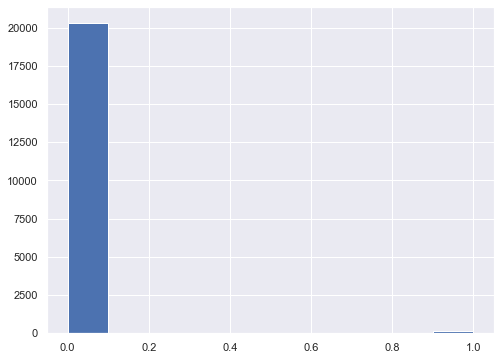

In [9]:
plt.rcParams['figure.figsize'] = 8,6
papermf['SheetBreak'].hist()

In [10]:
to_drop = ['DateTime']

In [11]:
papermf = papermf.drop(to_drop, axis = 1)

Class 0: 20323
Class 1: 135
Proportion of 1s vs 0s: 150.54 : 1


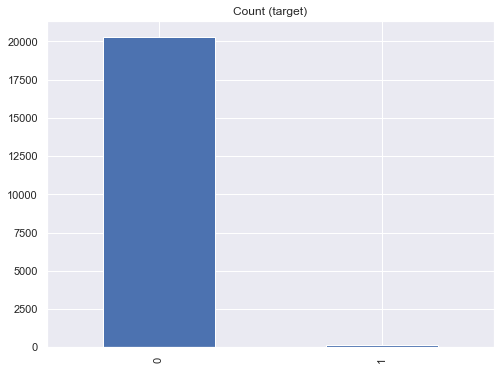

In [12]:
# Review Target Variable

target_count = papermf.SheetBreak.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

# Calculate the proportion of the 0S Over 1s
print('Proportion of 1s vs 0s:', round(target_count[0] / target_count[1], 2), ': 1')
# print('Proportion of 0s:', round(target_count[0] / len(papermf), 2), ': 1')
# print('Proportion of 1s:', round(target_count[1] / len(papermf), 2), ': 1')

# Plot the Target distibution
target_count.plot(kind='bar', title='Count (target)');

<h2 id="t1" style="margin-bottom: 18px">Data Preprocessing</h2>

The objective is to predict a rare event in advance to prevent it, or its consequences.   

From a modeling standpoint, this translates to teaching the model to identify a transitional phase that would lead to a rare event.   

For example, in the sheet-break problem, a transitional phase could be the speed of one of the rollers (in Figure 1.1) drifting away and rising in comparison to the other rollers. Such asynchronous change stretches the paper sheet. If this continues, the sheet’s tension increases and ultimately causes a break.   

The sheet break would typically happen a few minutes after the drift starts. Therefore, if the model is taught to identify the start of the drift it can predict the break in advance.

In [13]:
# Hot encoding
hotencoding1 = pd.get_dummies(papermf['Grade&Bwt'])
hotencoding1 = hotencoding1.add_prefix ('grade_')
hotencoding2 = pd.get_dummies(papermf['EventPress'])
hotencoding2 = hotencoding2.add_prefix ('eventpress_')

papermf = papermf.drop(['Grade&Bwt', 'EventPress'], axis =1)

papermf = pd.concat([papermf , hotencoding1 , hotencoding2 ],axis =1)

In [14]:
# Calculate Correlation
corr_matrix = papermf.corr()

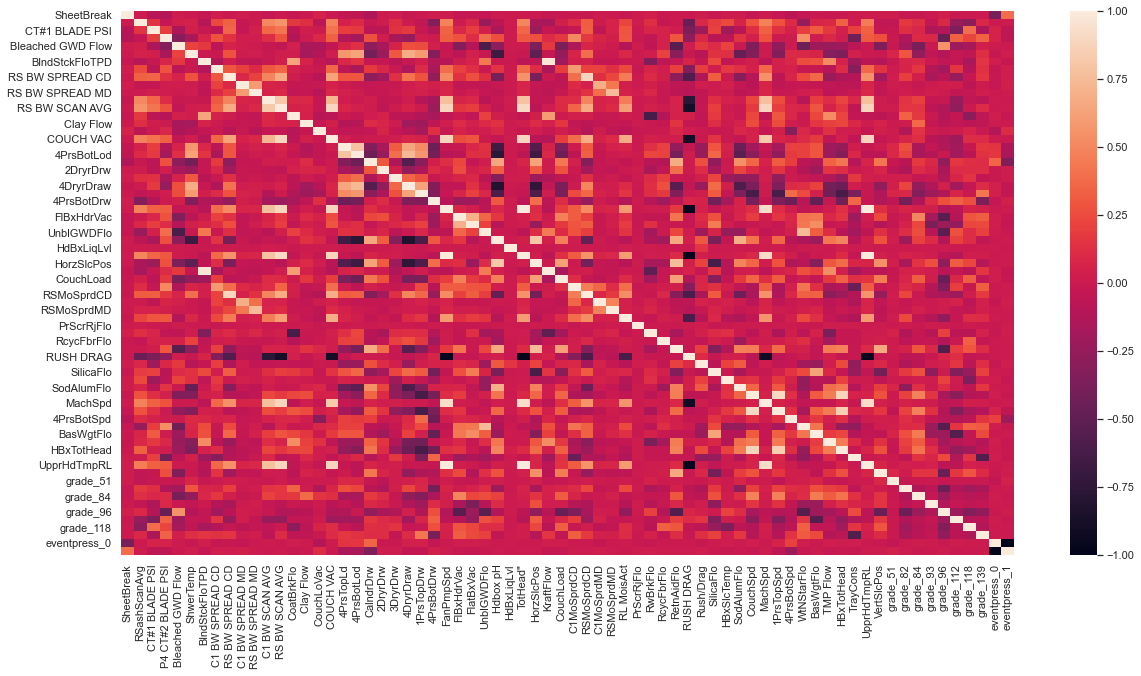

In [15]:
# Correlation Matrix Plot

import seaborn

plt.rcParams['figure.figsize'] = 20,10  # control plot size

corr_matrix = papermf.corr()
seaborn.heatmap(corr_matrix )
plt.show()

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

In [16]:
# #`pairplot()` may become very slow with the SVG format
# import seaborn as sns
# %config InlineBackend.figure_format = 'png'
# sns.pairplot(papermf);

<h2 id="t1" style="margin-bottom: 18px">Machine Learning</h2>

In [17]:
 X = papermf.drop('SheetBreak', axis = 1)
 y = papermf.SheetBreak

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(papermf.drop('SheetBreak', axis = 1),
                                               papermf.SheetBreak,
                                               test_size = .2,
                                               random_state=12)


In [19]:
# Confusion Matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# # Using a Dummy Classifier

# from sklearn.dummy import DummyClassifier
# dummy_baseline = DummyClassifier(strategy="most_frequent")
# dummy_baseline.fit(test_features, test_target)

# DummyClf = dummy_baseline.score(test_features, test_target)


In [21]:
# DecisionTreeModel  = DecisionTreeClassifier(criterion = 'entropy', random_state = 45)
# NBModel            = GaussianNB()
# LRModel            = LogisticRegression(random_state = 45)
# SVMModel           = SVC(kernel = 'linear', random_state = 45)
# KSVMModel          = SVC(kernel = 'rbf', random_state = 0)
# RFModel            = RandomForestClassifier( n_estimators=80, max_features=7, oob_score= True, random_state= 42)
# BModel             = BaggingClassifier(tree.DecisionTreeClassifier(random_state=45), n_estimators = 99)
# ADBModel           = AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')
# GBModel            = GradientBoostingClassifier()
# ExTrModel          = ExtraTreesClassifier()
# KNNModel           = KNeighborsClassifier(n_neighbors = 57)#  , metric = 'minkowski', p = 2

In [22]:
# DecisionTreeModel.fit(training_features, training_target)
# NBModel.fit(training_features, training_target)
# LRModel.fit(training_features, training_target)
# SVMModel.fit(training_features, training_target)
# KSVMModel.fit(training_features, training_target)
# RFModel.fit(training_features, training_target)
# BModel.fit(training_features, training_target)
# ADBModel.fit(training_features, training_target)
# GBModel.fit(training_features, training_target)
# ExTrModel.fit(training_features, training_target)
# KNNModel.fit(training_features, training_target)

In [23]:
# DT_Pred = DecisionTreeModel.predict(test_features)
# NB_pred = NBModel.predict(test_features)
# LR_pred =LRModel.predict(test_features)
# SVM_pred = SVMModel.predict(test_features)
# KSVM_pred = KSVMModel.predict(test_features)
# RF_pred = RFModel.predict(test_features)
# Bagg_pred = BModel.predict(test_features)
# ADB_pred = ADBModel.predict(test_features)
# GB_pred = GBModel.predict(test_features)
# ExTr_pred = ExTrModel.predict(test_features)
# KNN_pred = KNNModel.predict(test_features)

In [24]:
# ADT= accuracy_score(test_target, DT_Pred)
# ACNB= accuracy_score(test_target, NB_pred)
# ACLR= accuracy_score(test_target, LR_pred )
# ACSVM= accuracy_score(test_target, SVM_pred )
# ACKSVM= accuracy_score(test_target, KSVM_pred)
# ACRF= accuracy_score(test_target, RF_pred )
# ACBagg= accuracy_score(test_target, Bagg_pred )
# CMADB= confusion_matrix(test_target, ADB_pred)
# ACGB= accuracy_score(test_target, GB_pred )
# ACExTr= accuracy_score(test_target, ExTr_pred )
# ACKNN= accuracy_score(test_target, KNN_pred )

In [25]:
# # Accuracy Score
# print(" Random Prediction on frequency                            : {:.2f}%".format(score * 100))
# print(" Naive Byes Prediction Accuracy                            : {:.2f}%".format(ACNB    *   100))
# print(" Ensemble - Ada-Boost Prediction Accuracy                  : {:.2f}%".format(ACADB * 100)) 
# print(" Ensemble - Bagging Prediction Accuracy                    : {:.2f}%".format(ACBagg * 100))
# print(" Ridge Classifier Prediction Accuracy                      : {:.2f}%".format(ACRC * 100))
# print(" Decision Tree Prediction Accuracy                         : {:.2f}%".format(ADT * 100))
# print(" Ensemble - ExtraTrees Prediction Accuracy                 : {:.2f}%".format(ACExTr * 100))
# print(" Random Forest Prediction Accuracy                         : {:.2f}%".format(ACRF * 100))
# print(" Logistic Regression Prediction Accuracy                   : {:.2f}%".format(ACLR    *   100))
# print(" Support Vector Machine Prediction Accuracy                : {:.2f}%".format(ACSVM   *   100))
# print(" Ensemble - Gradient Boosting Prediction Accuracy          : {:.2f}%".format(ACGB * 100))
# print(" K-Support Vector Machine Prediction Accuracy              : {:.2f}%".format(ACKSVM  *   100))


In [26]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features, training_target,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.994806 (0.000432)
LDA    : 0.994806 (0.000274)
KNN    : 0.993890 (0.000001)
CART   : 0.994990 (0.000566)
GNB    : 0.705866 (0.102531)
SVM    : 0.994867 (0.000829)
KSVM   : 0.993890 (0.000001)
ABM    : 0.995295 (0.000834)
GBM    : 0.994928 (0.000739)
RFM    : 0.995784 (0.000708)
ExT    : 0.994806 (0.000274)


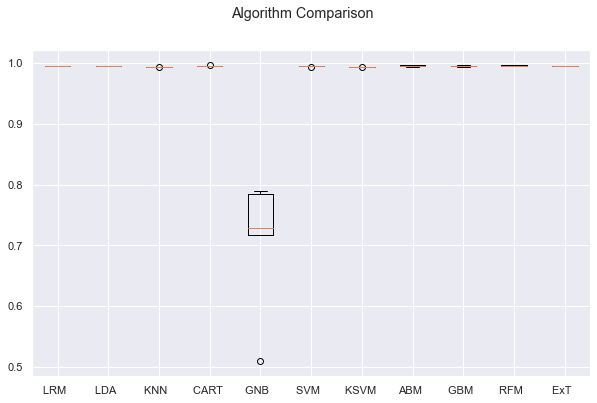

In [27]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h2 id="t2" style="margin-bottom: 18px">The metric trap</h2>

One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like <code>accuracy_score</code> can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

Let's do this experiment, using simple cross-validation and no feature engineering:

As we can see, the high accuracy rate was just an illusion. In this way, the choice of the metric used in unbalanced datasets is extremely important. In this competition, the evaluation metric is the Normalized Gini Coefficient, a more robust metric for imbalanced datasets, that ranges from approximately 0 for random guessing, to approximately 0.5 for a perfect score.

In [28]:
RFModel = RandomForestClassifier( n_estimators=80, max_features=7, oob_score= True, random_state= 42)
RFModel.fit(training_features, training_target)
RF_pred = RFModel.predict(test_features)
ACRF= accuracy_score(test_target, RF_pred )

print("Accuracy: %.2f%%" % (ACRF * 100.0))



Accuracy: 99.58%


<h2 id="t3" style="margin-bottom: 18px">Confusion matrix</h2>

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Confusion matrix:
 [[4057    0]
 [  17   18]]


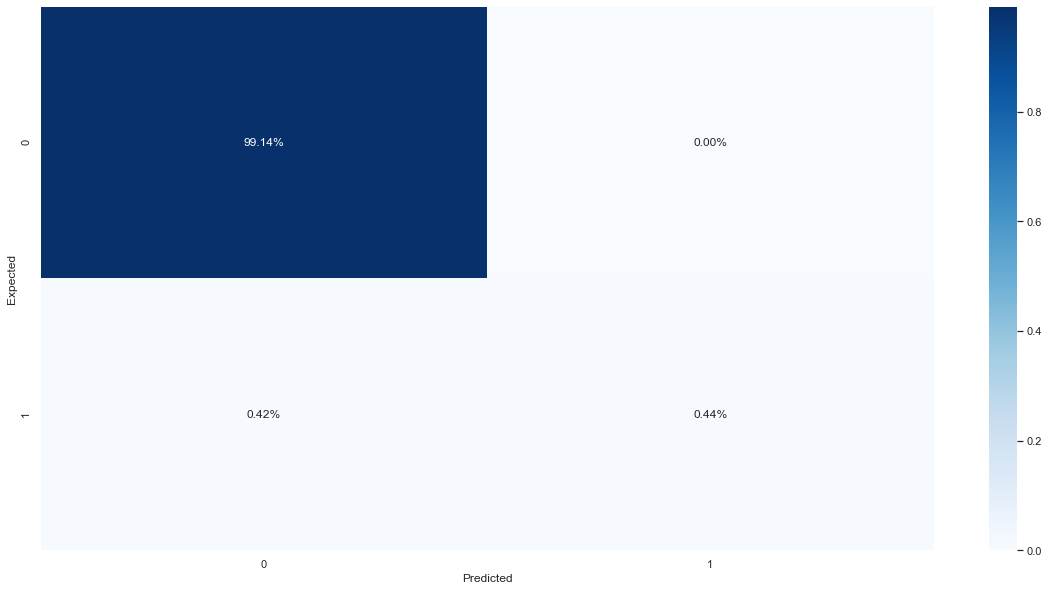

In [29]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true = test_target, y_pred = RF_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
#cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
# fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

<h2 id="t4" style="margin-bottom: 18px">Resampling</h2>

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the <code>DataFrame.sample</code> method to get random samples each class:

In [30]:
# Class count
#df_train = papermf
count_class_0, count_class_1 = papermf.SheetBreak.value_counts()

# Divide by class
df_class_0 = papermf[papermf['SheetBreak'] == 0]
df_class_1 = papermf[papermf['SheetBreak'] == 1]

In [31]:
print(count_class_0)
print(count_class_1)

20323
135


<h2 id="t5">Random under-sampling</h2>

In [32]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(135, 70)

Random under-sampling:
0    135
1    135
Name: SheetBreak, dtype: int64


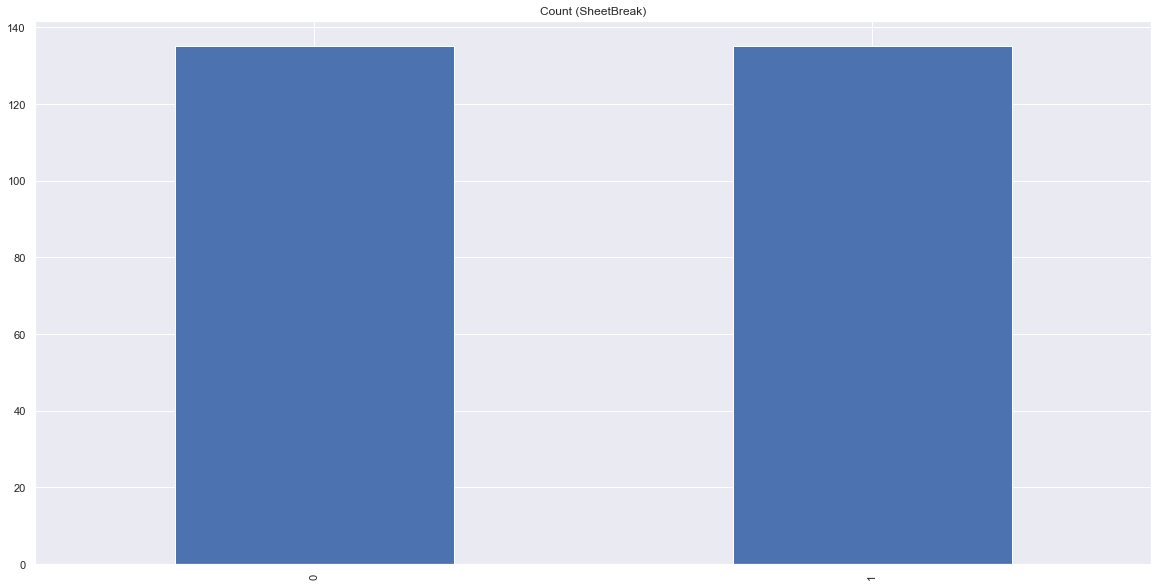

In [33]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.SheetBreak.value_counts())

df_test_under.SheetBreak.value_counts().plot(kind='bar', title='Count (SheetBreak)');

In [34]:
 X = df_test_under.drop('SheetBreak', axis = 1)
 y = df_test_under.SheetBreak

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features_under, test_features_under, \
training_target_under, test_target_under, = train_test_split(df_test_under.drop('SheetBreak', axis = 1),
                                               df_test_under.SheetBreak,
                                               test_size = .2,
                                               random_state=12)


In [36]:
RFModelUnder = RandomForestClassifier( n_estimators=80, max_features=7, oob_score= True, random_state= 42)

RFModelUnder.fit(training_features_under, training_target_under)
RF_predUnder =RFModelUnder.predict(test_features_under)


ACRFUnder = accuracy_score(test_target_under, RF_predUnder)
print(" Logistic Regression Prediction Accuracy Under              : {:.2f}%".format(ACRFUnder * 100))

 Logistic Regression Prediction Accuracy Under              : 98.15%


In [37]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
#models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features_under, training_target_under,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.787104 (0.053516)
LDA    : 0.736152 (0.068146)
KNN    : 0.523044 (0.052940)
CART   : 0.805497 (0.045775)
GNB    : 0.666808 (0.083295)
KSVM   : 0.532135 (0.059504)
ABM    : 0.768922 (0.068623)
GBM    : 0.805814 (0.035953)
RFM    : 0.805603 (0.031180)
ExT    : 0.773150 (0.027022)


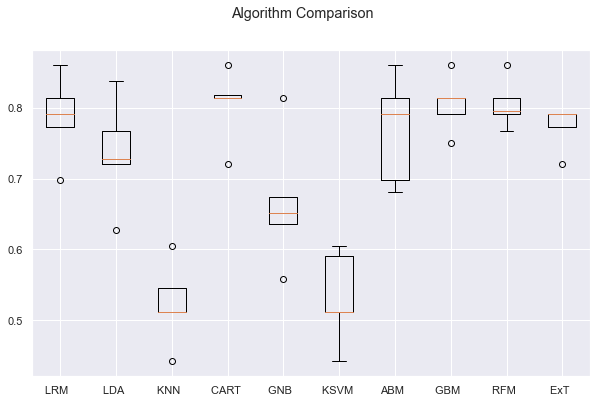

In [38]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<h2 id="t6">Random over-sampling</h2>

In [39]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(20323, 70)

Random over-sampling:
0    20323
1    20323
Name: SheetBreak, dtype: int64


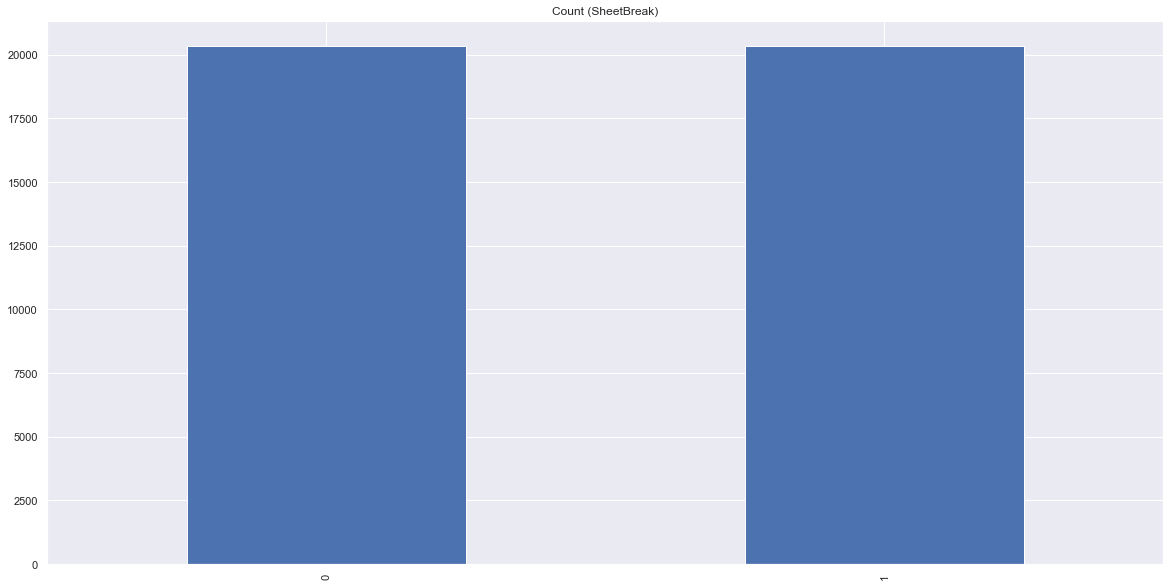

In [40]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.SheetBreak.value_counts())

df_test_over.SheetBreak.value_counts().plot(kind='bar', title='Count (SheetBreak)');

In [41]:
 X = df_test_over.drop('SheetBreak', axis = 1)
 y = df_test_over.SheetBreak

In [42]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features_over, test_features_over, \
training_target_over, test_target_over, = train_test_split(df_test_over.drop('SheetBreak', axis = 1),
                                               df_test_over.SheetBreak,
                                               test_size = .2,
                                               random_state=12)


In [43]:
RFModelOver = RandomForestClassifier( n_estimators=80, max_features=7, oob_score= True, random_state= 42)

RFModelOver.fit(training_features_over, training_target_over)
RF_predOver =RFModelOver.predict(test_features_over)


ACRFOver = accuracy_score(test_target_over, RF_predOver)
print(" RandomForest Prediction Accuracy Over              : {:.2f}%".format(ACRFOver * 100))

 RandomForest Prediction Accuracy Over              : 99.99%


In [44]:
print(" RandomForest Prediction Accuracy                   : {:.2f}%".format(ACRF * 100))
print(" RandomForest Prediction Accuracy Under             : {:.2f}%".format(ACRFUnder * 100))
print(" RandomForest Prediction Accuracy Over              : {:.2f}%".format(ACRFOver * 100))

 RandomForest Prediction Accuracy                   : 99.58%
 RandomForest Prediction Accuracy Under             : 98.15%
 RandomForest Prediction Accuracy Over              : 99.99%


In [45]:
#from sklearn.model_selection import KFold
from sklearn import model_selection

# Spot Check Algorithms
scoring = 'accuracy'
models = []
models.append(('LRM  ', LogisticRegression(random_state = 45, solver='newton-cg', max_iter=1000)))
models.append(('LDA  ', LinearDiscriminantAnalysis()))
models.append(('KNN  ', KNeighborsClassifier(n_neighbors = 57  , metric = 'minkowski', p = 2)))
models.append(('CART ', DecisionTreeClassifier(criterion = 'entropy', random_state = 45)))
models.append(('GNB  ', GaussianNB()))
#models.append(('SVM  ', SVC(kernel = 'linear', random_state = 45)))
models.append(('KSVM ', SVC(kernel = 'rbf', random_state = 45)))
models.append(('ABM  ', AdaBoostClassifier(random_state=42 , n_estimators=  53, learning_rate = .7, algorithm = 'SAMME.R')))
models.append(('GBM  ', GradientBoostingClassifier()))
models.append(('RFM  ', RandomForestClassifier(n_estimators=80, max_features=7, oob_score= True, random_state= 42)))
models.append(('ExT  ', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    cv_results = model_selection.cross_val_score(model, training_features_over, training_target_over,  scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRM    : 0.850965 (0.005644)
LDA    : 0.825778 (0.003960)
KNN    : 0.912474 (0.001744)
CART   : 0.998124 (0.000265)
GNB    : 0.720384 (0.005613)
KSVM   : 0.686462 (0.006513)
ABM    : 0.979795 (0.003888)
GBM    : 0.995202 (0.001157)
RFM    : 0.999846 (0.000097)
ExT    : 0.999969 (0.000062)


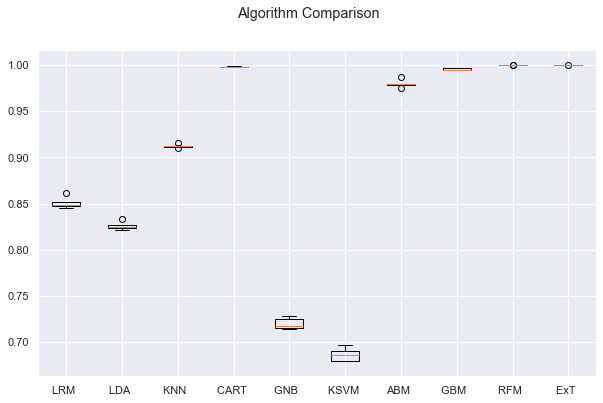

In [46]:
# Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
smote = SMOTE(random_state = 212 , k_neighbors =1)
X_train_scaled_resampled , y_train_resampled =smote.fit_resample(X_train_scaled ,y_train )
print ('Resampled dataset shape %s' % Counter (y_train_resampled))

<h2 id="t7" style="margin-bottom: 18px">Python imbalanced-learn module</h2>

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/). It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [47]:
! pip install imblearn

You should consider upgrading via the 'c:\users\medwa\anaconda3\python.exe -m pip install --upgrade pip' command.


In [48]:
import imblearn

For ease of visualization, let's create a small unbalanced sample dataset using the <code>make_classification</code> method:

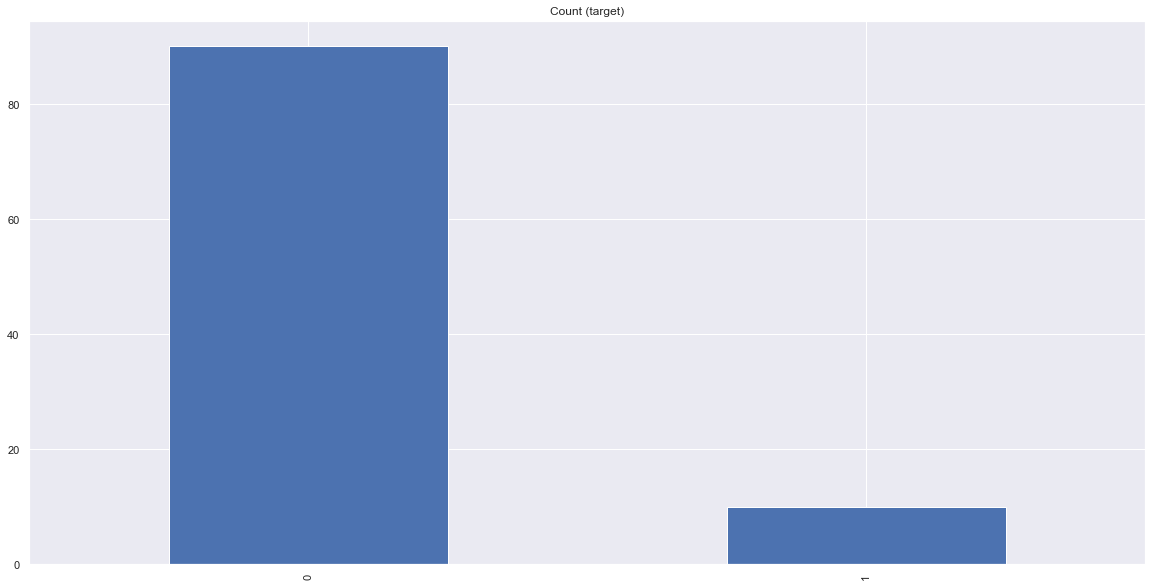

In [49]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

papermf = pd.DataFrame(X)
papermf['SheetBreak'] = y
papermf.SheetBreak.value_counts().plot(kind='bar', title='Count (target)');

We will also create a 2-dimensional plot function, <code>plot_2d_space</code>, to see the data distribution:

In [53]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

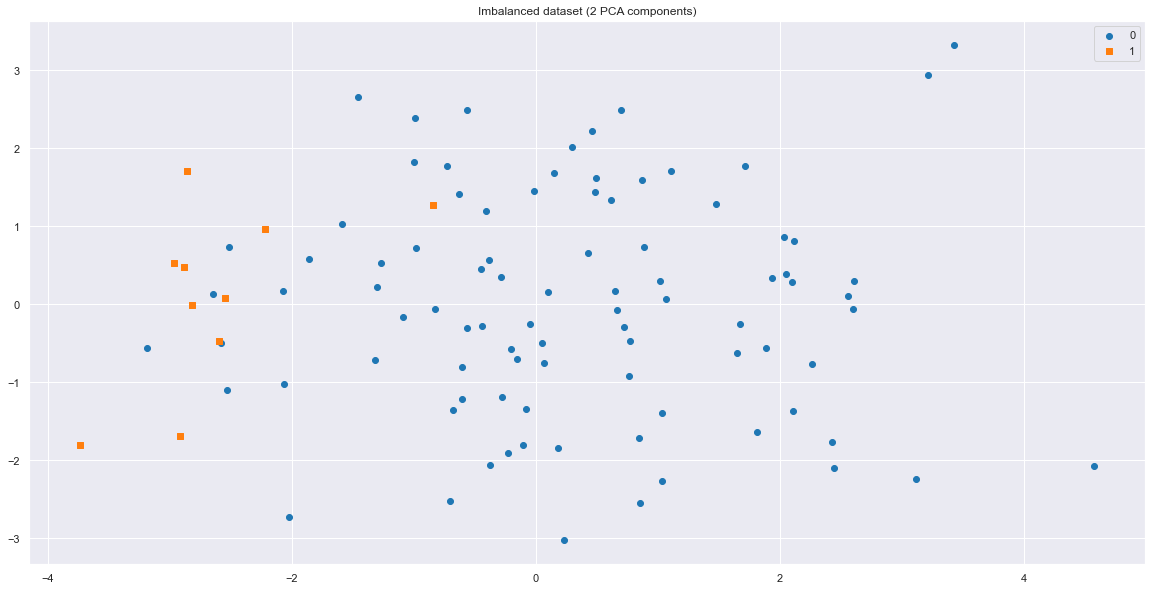

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

<h2 id="#t72">Random under-sampling and over-sampling with imbalanced-learn</h2>

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


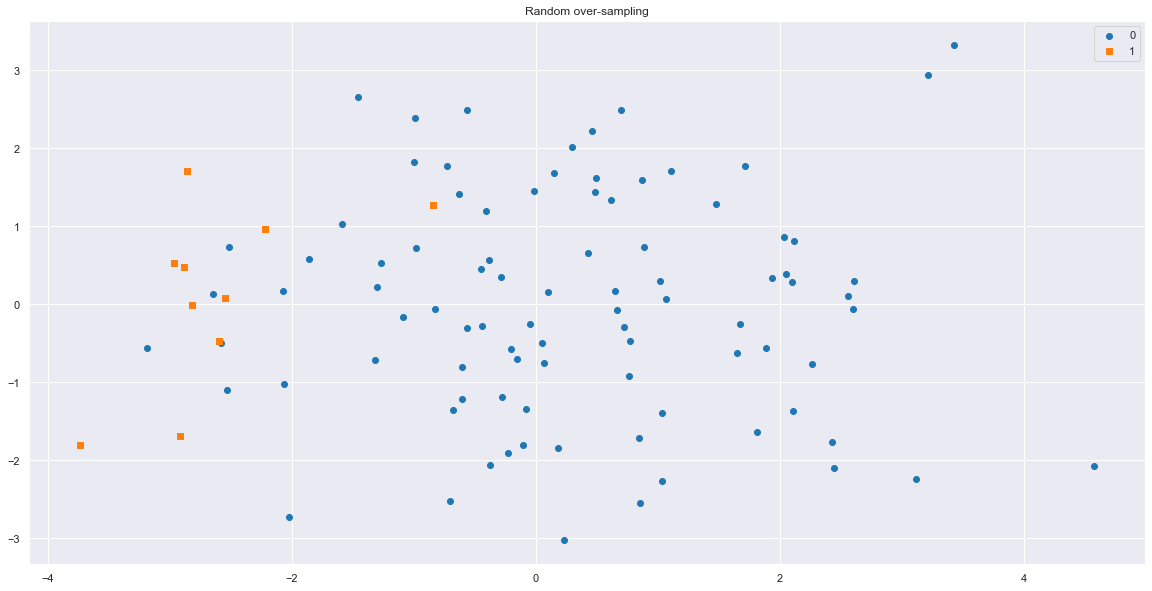

In [54]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

<h2 id="t8" style="margin-bottom: 18px">Under-sampling: Tomek links</h2>

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

In the code below, we'll use <code>ratio='majority'</code> to resample the majority class.

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

<h2 id="t9" style="margin-bottom: 18px">Under-sampling: Cluster Centroids</h2>

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In this example we will pass the <code>{0: 10}</code> dict for the parameter <code>ratio</code>, to preserve 10 elements from the majority class (0), and all minority class (1) .

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

<h2 id="t10" style="margin-bottom: 18px">Over-sampling: SMOTE</h2>

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

 ![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

We'll use <code>ratio='minority'</code> to resample the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

<h2 id="t11" style="margin-bottom: 18px">Over-sampling followed by under-sampling</h2>

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [ ]:
model = XGBClassifier()
model.fit(training_features[['age']], training_target)
XGB_pred = model.predict(test_features[['age']])

accuracy = accuracy_score(test_target, XGB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))